<a href="https://colab.research.google.com/github/vitorsr/ccd/blob/master/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!apt-get update -qqq

# Bibliotecas necessárias para instalação do cartopy e geoplot
#   Ver: https://github.com/googlecolab/colabtools/issues/85#issuecomment-372532728
!apt-get install -y -qqq libproj-dev proj-data proj-bin
!apt-get install -y -qqq libgeos-dev

!pip install -q -U cartopy
!pip install -q -U geopandas
!pip install -q -U geoplot

In [0]:
import pandas as pd
import mapclassify
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt

In [0]:
stations_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115089&authkey=AN3WuZnSKh9jgC8")
inmetr_df = pd.read_csv("https://raw.githubusercontent.com/vitorsr/ccd/master/data/baseline_temp2.csv?token=AFPQLZBILR7UOZB72SARAY25XY5US")

# inmetr_df = pd.read_csv("https://onedrive.live.com/download?cid=BCBADB0836C97273&resid=BCBADB0836C97273%21115090&authkey=AHJ7x3UN1MzJW1M")

In [10]:
inmetr_df

,date,id,tair,tmax,tmin,tw
0,08-01,82024,-3.135246,2.330769,-1.400000,-1.482883
1,08-01,82098,1.862640,1.224000,2.968000,0.983221
2,08-01,82106,-0.256329,0.103704,0.892453,1.455479
3,08-01,82141,1.204618,0.666038,3.034615,0.761078
4,08-01,82145,0.789368,1.067500,1.788372,0.633046
...,...,...,...,...,...,...
5404,08-31,83964,-1.123410,-0.470455,-0.202326,0.705897
5405,08-31,83967,-0.686076,-3.014815,1.864151,0.562252
5406,08-31,83980,-1.700680,-3.338298,0.040426,-0.286758
5407,08-31,83985,0.298754,-1.144118,2.300000,0.881308


In [11]:
df

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,tair,tmax,tmin,tw
0,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-01,1.241905,3.297674,0.611111,0.155556
1,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-02,1.075887,3.111628,1.380000,NaN
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-03,-3.331915,-6.439024,-2.695455,NaN
3,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-04,-6.830952,-5.102381,-6.804545,NaN
4,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-05,-6.502128,-2.728571,-8.546667,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-27,-1.316667,-1.418519,-0.080000,NaN
5405,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-28,-1.004487,-0.959259,-0.428000,NaN
5406,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-29,-0.206410,0.088889,-0.314000,NaN
5407,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-30,0.187179,0.468519,1.114000,NaN


In [0]:
df = pd.merge(stations_df, inmetr_df, on='id')

In [0]:
!wget -q "https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_BRA_shp.zip"
!unzip -qq -u gadm36_BRA_shp.zip

In [0]:
br = gpd.read_file('gadm36_BRA_1.shp') # 0=país, 1=estado, 2=cidade

In [0]:
# Preparando os dados para geração dos mapas enquanto a análise numérica não é finalizada.
df_sorted = df.sort_values(by=['date'])
tair_df_2019_08 = df_sorted[(df_sorted['date'] >= '08-01') & (df_sorted['date'] <= '08-31')]

tair_lst_2019_08 = [v for k, v in tair_df_2018_08.groupby('date')]


In [0]:
# gdf = gpd.GeoDataFrame(
#     df, 
#     geometry=gpd.points_from_xy(df.lon, df.lat))

In [0]:
tair_df_2019_08_01_00 = tair_lst_2018_08[0]
gdf_2019_08_01_00 = gpd.GeoDataFrame(
    tair_df_2019_08_01_00, 
    geometry=gpd.points_from_xy(tair_df_2019_08_01_00.lon, tair_df_2019_08_01_00.lat))

In [21]:
gdf

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,tair,tmax,tmin,tw,geometry
0,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-01,1.241905,3.297674,0.611111,0.155556,POINT (-67.80000 -9.96667)
1,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-02,1.075887,3.111628,1.380000,NaN,POINT (-67.80000 -9.96667)
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-03,-3.331915,-6.439024,-2.695455,NaN,POINT (-67.80000 -9.96667)
3,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-04,-6.830952,-5.102381,-6.804545,NaN,POINT (-67.80000 -9.96667)
4,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-05,-6.502128,-2.728571,-8.546667,NaN,POINT (-67.80000 -9.96667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-27,-1.316667,-1.418519,-0.080000,NaN,POINT (-46.41667 -12.40000)
5405,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-28,-1.004487,-0.959259,-0.428000,NaN,POINT (-46.41667 -12.40000)
5406,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-29,-0.206410,0.088889,-0.314000,NaN,POINT (-46.41667 -12.40000)
5407,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-30,0.187179,0.468519,1.114000,NaN,POINT (-46.41667 -12.40000)


In [0]:
# Plotagem dos gráficos.
# TODO: iterar sobre a lista e gerar o .gif.
# O plot desejado contém o parâmetro clip, mas, como a função demora a plotar 
# o gráfico quando esse parâmetro é enviado, usamos um plot sem ele apenas 
# para testes.

# ax = gplt.kdeplot(gdf_2018_08_01_00[gdf_2018_08_01_00['tair'] > 0], shade=True, cmap='Reds', n_levels=20, )
# gplt.polyplot(br, zorder=1, ax=ax)
# plt.title("Mapa de ???, 08/01/2018 00:00")

In [0]:
# gdf['tair'] = gdf['tair'].round(2)
gdf_2019_08_01_00['tair'] = gdf_2019_08_01_00['tair'].round(2)

In [31]:
gdf

,id,lon,lat,alt,name,state,uf,time_zone,offset_utc,time_zone.1,offset_utc.1,date,tair,tmax,tmin,tw,geometry
0,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-01,1.24,3.297674,0.611111,0.155556,POINT (-67.80000 -9.96667)
1,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-02,1.08,3.111628,1.380000,NaN,POINT (-67.80000 -9.96667)
2,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-03,-3.33,-6.439024,-2.695455,NaN,POINT (-67.80000 -9.96667)
3,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-04,-6.83,-5.102381,-6.804545,NaN,POINT (-67.80000 -9.96667)
4,82915,-67.800000,-9.966667,160.00,Rio Branco,Acre,AC,America/Rio_Branco,-5,America/Rio_Branco,-5,08-05,-6.50,-2.728571,-8.546667,NaN,POINT (-67.80000 -9.96667)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5404,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-27,-1.32,-1.418519,-0.080000,NaN,POINT (-46.41667 -12.40000)
5405,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-28,-1.00,-0.959259,-0.428000,NaN,POINT (-46.41667 -12.40000)
5406,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-29,-0.21,0.088889,-0.314000,NaN,POINT (-46.41667 -12.40000)
5407,83235,-46.416667,-12.400000,603.59,Taguatinga,Tocantins,TO,America/Araguaina,-3,America/Araguaina,-3,08-30,0.19,0.468519,1.114000,NaN,POINT (-46.41667 -12.40000)


Text(0.5, 1.0, 'Air Temperature @ 2019/08/01 ')

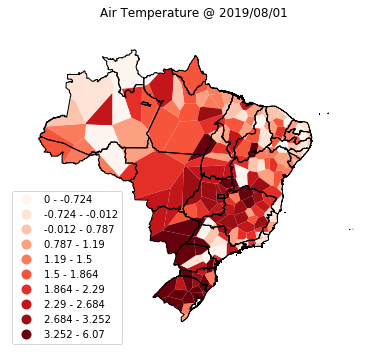

In [52]:
var = 'tair'
ax = gplt.voronoi(
    gdf_2019_08_01_00[gdf_2019_08_01_00[var] == gdf_2019_08_01_00[var]], # Nota: NaN == NaN sempre retorna False!
    clip=br.simplify(0.1),
    hue=var, k=10, cmap='Reds', edgecolor='None',
    legend=True
)
gplt.polyplot(br, edgecolor='black', zorder=1, ax=ax)
ax.set_title("Air Temperature @ 2019/08/01 ")